In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


### 1) Сгенерировать последовательность σ скрытых состоянийи последовательность ε наблюдений длины L.

In [52]:
# при М=2 работает
M = 2
K = 6

# np.random.seed(54)

transitions_probab = np.zeros((M,M))
emissions_probab= np.zeros((M,K))


for i in range(M):
    # заполним вероятности перехода от одного состояния к другому
    st2st_probab = np.random.random(M)
    transitions_probab[i] = st2st_probab/st2st_probab.sum()

    # для каждого состояния заполним вероятности эмиссий
    st2e_probab = np.random.random(K)
    emissions_probab[i] = st2e_probab/st2e_probab.sum()

transitions_probab[0]=[0.95,0.05]
transitions_probab[1]=[0.1,0.9]

emissions_probab[0]=[1/6,1/6,1/6,1/6,1/6,1/6]
emissions_probab[1]=[0.1,0.1,0.1,0.1,0.1,0.5]

print('Transititions probability')
for line in transitions_probab:
    print(f'sum {round(line.sum(),2)}\t{line}')
print('--------------------')
print('Emissions probabability')
for line in emissions_probab:
    print(f'sum {round(line.sum(),2)}\t{line}')

Transititions probability
sum 1.0	[0.95 0.05]
sum 1.0	[0.1 0.9]
--------------------
Emissions probabability
sum 1.0	[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
sum 1.0	[0.1 0.1 0.1 0.1 0.1 0.5]


In [53]:
def get_next_state(weights):
    return np.random.choice(range(len(weights)),p=weights)


def get_hidden_states(begin,transitions_probab,L):
    hidden_states=np.zeros((L,),dtype=np.int32)
    hidden_states[0]=get_next_state(begin)
    for i in range(1,L):
        hidden_states[i]=get_next_state(transitions_probab[hidden_states[i-1]])
    return hidden_states

def get_emissions(hidden_sequence,emissions_probab):
    emissions=np.zeros((L,),dtype=np.int32)
    for i in range(L):
        emissions[i]=get_next_state(emissions_probab[hidden_sequence[i]])
    return emissions

In [58]:
np.dot(transitions_probab,np.array([1,1]))

array([1., 1.])

In [56]:
e

array([1.  , 0.85])

In [57]:
v[:, 0]

array([0.70710678, 0.70710678])

In [55]:
e, v = np.linalg.eig(transitions_probab)
begin = v[:, 0]
print(begin)

# L = 150
L = 150
np.random.seed(51)

generated_hidden_states=get_hidden_states(begin,transitions_probab,L)
generated_emissions=get_emissions(generated_hidden_states,emissions_probab)

generated_emissions

[0.5 0.5]


array([3, 3, 0, 1, 5, 3, 0, 3, 3, 5, 5, 3, 2, 5, 5, 3, 5, 3, 5, 5, 3, 0,
       2, 0, 0, 3, 5, 2, 0, 4, 2, 4, 4, 3, 3, 4, 3, 2, 5, 1, 1, 0, 4, 5,
       0, 5, 0, 3, 2, 4, 3, 5, 2, 5, 0, 3, 3, 4, 2, 3, 2, 1, 5, 0, 4, 5,
       2, 5, 5, 1, 1, 1, 1, 1, 3, 5, 3, 1, 1, 4, 3, 1, 4, 1, 4, 0, 5, 3,
       5, 3, 2, 3, 2, 4, 5, 2, 0, 4, 2, 1, 4, 0, 0, 2, 3, 4, 1, 2, 2, 2,
       3, 1, 3, 2, 3, 0, 3, 1, 5, 1, 0, 5, 5, 2, 5, 5, 3, 1, 5, 1, 1, 0,
       3, 2, 2, 2, 2, 1, 2, 1, 1, 3, 0, 3, 5, 3, 5, 1, 4, 5], dtype=int32)

## 2.1) Поиск наиболее вероятностной комбинации состояний.

## Алгоритм Витерби

In [38]:
expected_states= np.zeros((L, M))

# установим начальные значения
# в первой строке сохраним произвдение вероятности эмиссии generated_emissions[0] i-го состояния и вероятности i-го состояния
for i in range(M):
    expected_states[0, i] = emissions_probab[i, generated_emissions[0]]*begin[i]

for i in range(1, L):
    for j in range(M):
        state_max_probab=[]
        # состояние j переходит в состояние j
        # состояние [1,2,..,M] (без j) переходит в состояние j
        for k in range(M):
            state_max_probab.append(expected_states[i-1][k]*transitions_probab[k,j])

        expected_states[i, j] = emissions_probab[j, generated_emissions[i]]*max(state_max_probab)


viterbi = np.argmax(expected_states, axis = 1)
viterbi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 2.2) Визуализировать результат: построить на графике σ и σv (на оси x -позиция, на оси y - номер состояния


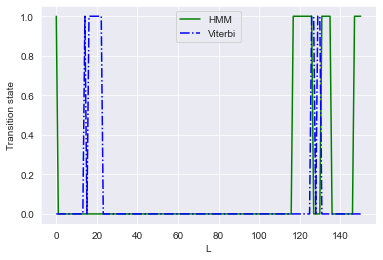

In [39]:
steps = np.linspace(0, L, L)

plt.ylabel('Transition state')
plt.xlabel('L')
plt.plot(steps, generated_hidden_states, label = 'HMM', color='g')
plt.plot(steps, viterbi, '-.', label = 'Viterbi',color='b')
plt.legend()
plt.show()

### 3.1) Алгоритм прямого обхода

In [40]:
def do_forward(M,L,transitions_probab,emissions_probab,begin,generated_emissions,generated_hidden_states):

    # forward_states_probab = np.zeros((L, M))
    #
    # # далее зададим значение веротяностей состояний с учетом состояния эмиссии
    # for j in range(M):
    #     forward_states_probab[0, j] = emissions_probab[j, generated_hidden_states[0]]*begin[j]

    forward_states_probab = np.zeros((L+1, M))
    forward_states_probab[0] = begin

    for j in range(M):
        forward_states_probab[1, j] = emissions_probab[j, generated_hidden_states[0]]*begin[j]

    for i in range(2, L+1):
        for j in range(M):
            probab=0
            # переходит сам в себя
            # состояние [1,2,..,M] (без j) переходит в состояние j
            for k in range(M):
                probab+= forward_states_probab[i-1][k]*transitions_probab[k,j]*emissions_probab[j, generated_emissions[i-1]]

            forward_states_probab[i, j]=probab

    return forward_states_probab

In [41]:
data=open('casino_emissions.txt').readlines()[0]
test_casino=[]
for char in data:
    test_casino.append(int(char)-1)
print(len(test_casino))

300


In [42]:
res_fw = do_forward(M,300,transitions_probab,emissions_probab,begin,test_casino,generated_hidden_states)
print(res_fw[-1].sum())
# print(np.exp(res_fw[-1].sum()))

3.170640583456159e-225


In [8]:
res_fw = do_forward(M,L,transitions_probab,emissions_probab,begin,generated_emissions,generated_hidden_states)
print(res_fw[-1].sum())
# print(np.exp(res_fw[-1].sum()))

NameError: name 'do_forward' is not defined

### 3.2) Алгоритм обратного обхода

In [43]:
def do_backward(transitions_probab,emissions_probab,L, begin,generated_emissions):

    backward_states_probab = np.zeros((L+1, M))
    # backward_states_probab = np.zeros((L+1, M))

    # backward_states_probab[L,:]=np.log(np.ones((M,)))
    backward_states_probab[L,:]=np.ones((M,))

    # for i in reversed(range(0,L)):
    for i in range(L-1,-1,-1):
        for j in range(M):
            probab=0
            # переходит сам в себя
            # состояние [1,2,..,M] (без j) переходит в состояние j
            for k in range(M):
                probab+=backward_states_probab[i+1][k]*transitions_probab[j, k]*emissions_probab[j, generated_emissions[i]]

            backward_states_probab[i, j]=probab

    backward_states_probab[0]*=begin
    # backward_states_probab[0]*=begin

    return backward_states_probab

In [44]:
# на примере казино вероятности прямого и обратного прохода совпадают

res_back = do_backward(transitions_probab,emissions_probab,300,begin,test_casino)
print(res_back[0].sum())
# print(np.exp(res_back[0].sum()))

3.1706405834561605e-225


In [66]:
i=212
n=0
for p in range(2):
    n+=res_back[i,p]*res_fw[i,p]

n/res_back[0].sum()

1.0068954341440903

In [99]:
# на примере казино вероятности прямого и обратного прохода совпадают

res_back = do_backward(transitions_probab,emissions_probab,L,begin,generated_emissions)
print(res_back[0].sum())
# print(np.exp(res_back[0].sum()))

1.9968975543991816e-117


### 4) Апостериорное декодирование

Визуализировать результат: построить график P (state0|ε)(l).

In [49]:
def aposterior_decoding(forward,backward,k,probab):
    f_k=forward[:,k]
    b_k=backward[:,k]
    return (f_k*b_k)/probab

In [50]:
data=open('casino_states.txt').readlines()[0]
test_casino=[]
for char in data:
    if char=='L':
        test_casino.append(0)
    if char=='F':
        test_casino.append(1)

print(len(test_casino))

300


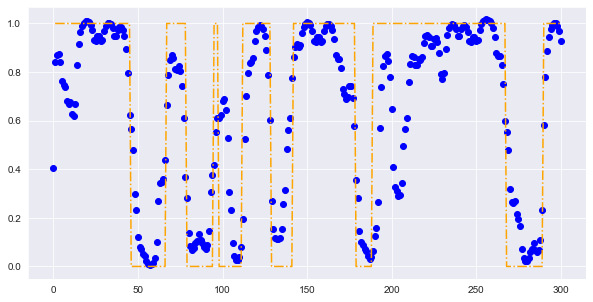

In [51]:
L=301
x=range(L)
k=0
y=aposterior_decoding(res_fw, res_back,k,res_fw[-1].sum())
plt.figure(figsize=(10,5))
plt.plot(x[1:],test_casino,'-.',color='orange')
plt.scatter(x,y,color='blue')
plt.show()

### 5) Алгоритм Баума-Велша